In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [159]:
autos_orig = pd.read_csv('../Ausgabedateien/autos_aufbereitet.csv')
autos_orig["Preis"] = autos_orig["Preis"].str.replace("'", "").str.strip()
autos_na =autos_orig.dropna(subset=['Preis', 'ps-stand', 'jahr'])
autos_na

,Unnamed: 0,web-scraper-order,web-scraper-start-url,Preis,plz,jahr,ps-stand,Farbe,PLZ4,%_IN_GDE,KTKZ,GDENR,GDENAMK,Hist.-Nummer,Kanton,Bezirks-nummer,Bezirksname,BFS Gde-nummer,Gemeindename,Datum der Aufnahme
1,1,1669622809-190,https://www.autolina.ch/elektro-auto,42500,6464,2022.0,204.0,weiss,6464.0,0.36,UR,1205.0,Bürglen (UR),11506.0,UR,400.0,Kt. Uri,1205,Bürglen (UR),1848-09-12
3,3,1669622809-192,https://www.autolina.ch/elektro-auto,44900,1184,2019.0,513.0,weiss,1184.0,100.00,VD,5858.0,Luins,14638.0,VD,2228.0,Nyon,5858,Luins,2006-09-01
9,9,1669622809-198,https://www.autolina.ch/elektro-auto,26450,6440,2020.0,145.0,grau,6440.0,99.54,SZ,1364.0,Ingenbohl,12657.0,SZ,506.0,Schwyz,1364,Ingenbohl,1848-09-12
10,10,1669622809-199,https://www.autolina.ch/elektro-auto,43899,8580,2017.0,525.0,blau,8580.0,0.51,SG,3202.0,Muolen,14379.0,SG,1721.0,St. Gallen,3202,Muolen,2003-01-01
11,11,1669622809-200,https://www.autolina.ch/elektro-auto,96699,8580,2021.0,573.0,weiss,8580.0,0.51,SG,3202.0,Muolen,14379.0,SG,1721.0,St. Gallen,3202,Muolen,2003-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,2307,1669622809-2496,https://www.autolina.ch/elektro-auto,79900,1163,2022.0,299.0,weiss,1163.0,100.00,VD,5636.0,Etoy,14703.0,VD,2227.0,Morges,5636,Etoy,2006-09-01
2207,2308,1669622809-2497,https://www.autolina.ch/elektro-auto,36890,1219,2021.0,136.0,weiss,1219.0,51.74,GE,6643.0,Vernier,10918.0,GE,2500.0,Cant. de Genève,6643,Vernier,1848-09-12
2208,2309,1669622809-2498,https://www.autolina.ch/elektro-auto,112790,4310,2022.0,503.0,schwarz,4310.0,98.50,AG,4258.0,Rheinfelden,12911.0,AG,1909.0,Rheinfelden,4258,Rheinfelden,1848-09-12
2210,2311,1669622809-2500,https://www.autolina.ch/elektro-auto,49800,3322,2022.0,218.0,blau,3322.0,100.00,BE,543.0,Mattstetten,15122.0,BE,246.0,Bern-Mittelland,543,Mattstetten,2010-01-01


Text(0.5, 0, 'PS-Stand')

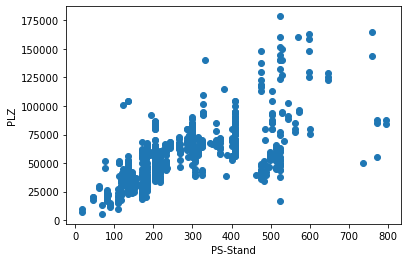

In [160]:
y = autos_na['Preis'].astype(int)
x = autos_na['ps-stand'].astype(int)

x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

plt.scatter(x,y)
plt.ylabel("PLZ")   
plt.xlabel("PS-Stand")



In [161]:
y.max()

178500

In [167]:
i = 2
arr = [[],[]]

while i < x.size:
    arr.append([y[i], x[i]])
    i = i+1
arr[0] = ([42500,204])
arr[1] = ([44900,513])



arr

[[42500, 204],
 [44900, 513],
 [26450, 145],
 [43899, 525],
 [96699, 573],
 [39799, 476],
 [38900, 387],
 [42000, 489],
 [42000, 204],
 [43500, 524],
 [46900, 497],
 [47800, 476],
 [61600, 408],
 [39600, 489],
 [54900, 524],
 [68000, 346],
 [123900, 524],
 [90900, 544],
 [66900, 229],
 [34730, 136],
 [51900, 204],
 [144900, 524],
 [31900, 119],
 [27500, 150],
 [58650, 513],
 [59900, 300],
 [43840, 204],
 [35860, 136],
 [61880, 228],
 [43550, 204],
 [12890, 88],
 [69500, 300],
 [84900, 503],
 [122980, 646],
 [94900, 530],
 [84980, 772],
 [61900, 184],
 [49800, 136],
 [37100, 145],
 [49970, 204],
 [72900, 265],
 [74900, 292],
 [69900, 408],
 [21600, 109],
 [49900, 204],
 [26900, 136],
 [148220, 476],
 [38900, 145],
 [15555, 109],
 [53800, 180],
 [16900, 109],
 [79900, 601],
 [61900, 269],
 [56900, 204],
 [60800, 204],
 [25900, 136],
 [23900, 136],
 [23800, 82],
 [23800, 82],
 [45800, 204],
 [51900, 111],
 [42900, 218],
 [21789, 116],
 [85900, 204],
 [52400, 306],
 [74900, 525],
 [92500, 

C:\Users\luchu\AppData\Local\Temp\ipykernel_31420\3441225059.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bx-', c='red')


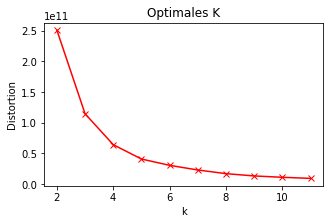

In [166]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,12,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(arr)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-', c='red')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimales K')

plt.show()

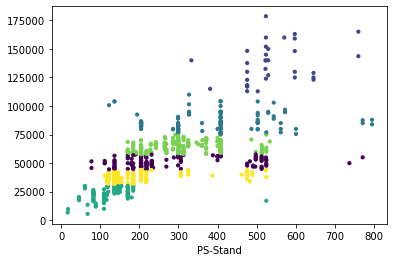

In [170]:
# Number of clusters
k = 6

# k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(arr)

# Predict the values
y2 = kmeans.predict(arr)

# Plot the clusters
plt.scatter(x, y, c=y2, s=10)
plt.xlabel("PS-Stand")

plt.show()

In [171]:
# Print centroids
centroids = kmeans.cluster_centers_
print('Cluster centroids:')
print(centroids, '\n')



Cluster centroids:
[[5.07377955e+04 2.63795455e+02]
 [1.37271212e+05 5.40181818e+02]
 [8.56168478e+04 3.51253623e+02]
 [2.31725755e+04 1.23509434e+02]
 [6.48324981e+04 2.94924528e+02]
 [3.76964877e+04 1.86057377e+02]] 

